In [27]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
#load dataset
dataFrame = pd.read_csv("iris.csv")
dataFrame.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
dataFrame.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
#check the data if there's a NaN Value
dataFrame.isna().values.any()

np.False_

In [31]:
#check the features
print (dataFrame.dtypes)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


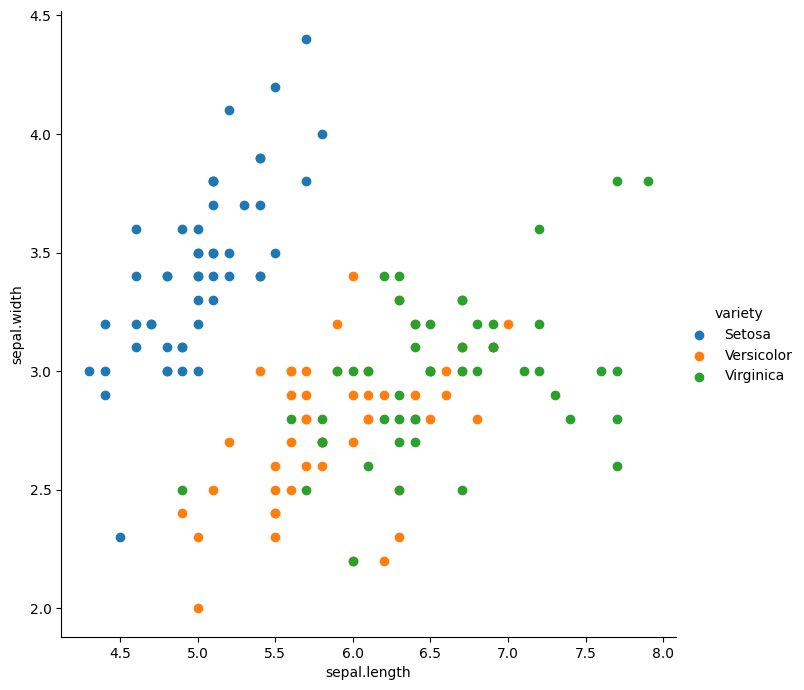

In [32]:
sns.FacetGrid(dataFrame, hue="variety", height=7) \
    .map(plt.scatter, "sepal.length", "sepal.width") \
    .add_legend()

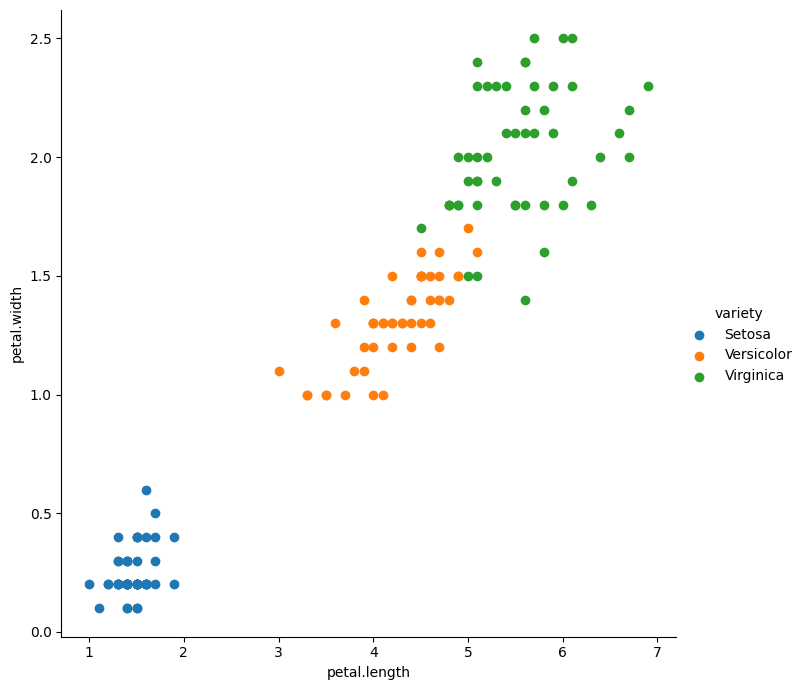

In [33]:
sns.FacetGrid(dataFrame, hue="variety", height=7) \
    .map(plt.scatter, "petal.length", "petal.width") \
    .add_legend()

In [34]:
#prepare the training set
X = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

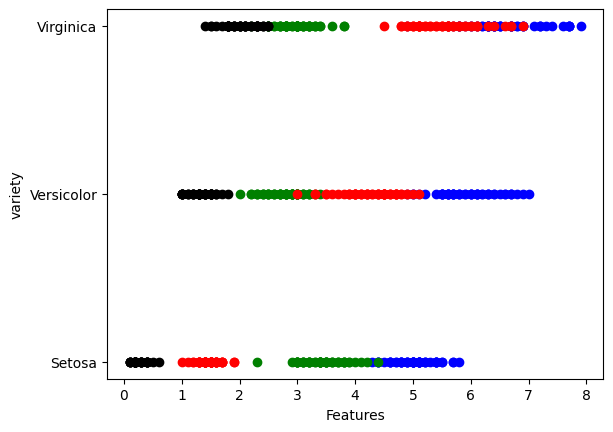

In [35]:
#plot the relation of each features to the target
plt.xlabel("Features")
plt.ylabel("variety")

pltX = dataFrame.loc[:, "sepal.length"]
pltY = dataFrame.loc[:, "variety"]
plt.scatter(pltX, pltY, color="blue", label="sepal.length")

pltX = dataFrame.loc[:, "sepal.width"]
pltY = dataFrame.loc[:, "variety"]
plt.scatter(pltX, pltY, color="green", label="sepal.width")

pltX = dataFrame.loc[:, "petal.length"]
pltY = dataFrame.loc[:, "variety"]
plt.scatter(pltX, pltY, color="red", label="petal.length")

pltX = dataFrame.loc[:, "petal.width"]
pltY = dataFrame.loc[:, "variety"]
plt.scatter(pltX, pltY, color="black", label="petal.width")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Setosa']


In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [44]:
import numpy as np

Text(0.5, 427.9555555555555, 'Predicted label')

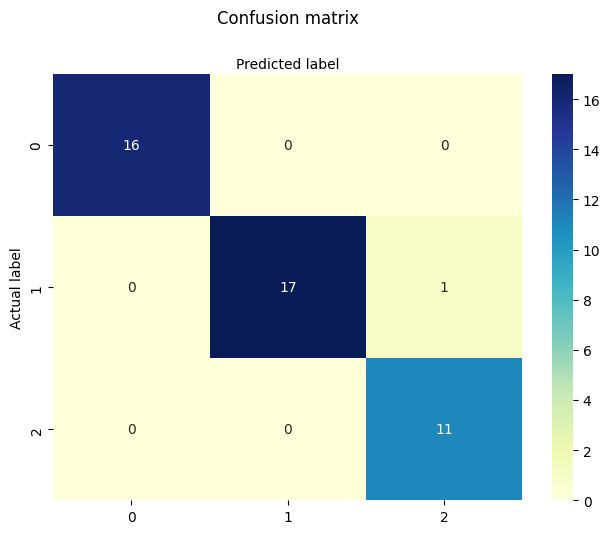

In [45]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
#check precision, recall, f1-score
print(classification_report(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy:  0.9777777777777777
